In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, "python")
sys.path.insert(0, "build")
import _autoneuronet as ann

# import autoneuronet as ann

/Users/rishabalagharu/.pyenv/versions/3.13.7/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Linear Regression


In [2]:
# Linear Regression
n_samples = 10

X = ann.Matrix(n_samples, 1)  # shape: (n_samples, 1)
y = ann.Matrix(n_samples, 1)  # shape: (n_samples, 1)

for i in range(n_samples):
    X[i, 0] = ann.Var(i)
    y[i, 0] = 5.0 * i + 3.0

In [3]:
lr = 1e-2
epochs = 1000

lr_model = ann.NeuralNetwork([ann.Linear(1, 1)])
optimizer = ann.GradientDescentOptimizer(learning_rate=lr, model=lr_model)

lr_model

NeuralNetwork =
Linear(1, 1)

In [4]:
# Training Loop

for epoch in tqdm(range(epochs), desc="Training linear regression model"):
    optimizer.resetGrad()

    # Forward pass
    y_pred = lr_model.forward(X)

    # Calculate the loss
    loss = ann.MSELoss(y, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training linear regression model: 100%|██████████| 1000/1000 [00:00<00:00, 70373.05it/s]

Epoch: 1 | Train Loss: 1003.9773954112588
Epoch: 101 | Train Loss: 0.40258276039498986
Epoch: 201 | Train Loss: 0.12970266626122046
Epoch: 301 | Train Loss: 0.04178713867122366
Epoch: 401 | Train Loss: 0.013462830091798644
Epoch: 501 | Train Loss: 0.004337406193486421
Epoch: 601 | Train Loss: 0.0013974099323108657
Epoch: 701 | Train Loss: 0.0004502125076166604
Epoch: 801 | Train Loss: 0.00014504784696873894
Epoch: 901 | Train Loss: 4.6730993818131144e-05


In [5]:
# Make Predictions
y_pred = lr_model.forward(X)

print(f"Ground Truth Labels:\n{y}\n")
print(f"Final Linear Regression Model Predictions:\n{y_pred}")

first_layer = lr_model.layers[0]
W_learned, b_learned = first_layer.W, first_layer.b

print(f"Learned W(0, 0) = {W_learned[0, 0]}")
print(f"Learned b(0, 0) = {b_learned[0, 0]}")

Ground Truth Labels:
Matrix(10 x 1) = 
3.000000 
8.000000 
13.000000 
18.000000 
23.000000 
28.000000 
33.000000 
38.000000 
43.000000 
48.000000 


Final Linear Regression Model Predictions:
Matrix(10 x 1) = 
2.992789 
7.993939 
12.995089 
17.996239 
22.997389 
27.998539 
32.999689 
38.000839 
43.001989 
48.003139 

Learned W(0, 0) = Var(val=5.001150, grad=0.000653)
Learned b(0, 0) = Var(val=2.992789, grad=-0.004095)


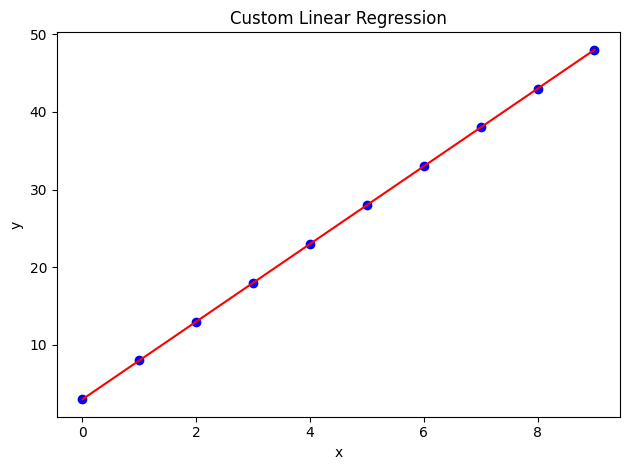

In [6]:
x_np = np.array([X[i, 0].getVal() for i in range(X.rows)])
y_np = np.array([y[i, 0].getVal() for i in range(y.rows)])
y_pred_np = np.array([y_pred[i, 0].getVal() for i in range(y_pred.rows)])

plt.scatter(x_np, y_np, color="blue")
plt.plot(x_np, y_pred_np, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Custom Linear Regression")

plt.tight_layout()
plt.show()

In [7]:
os.makedirs("models", exist_ok=True)
lr_model.saveWeights("models/lr_model.bin")

In [11]:
lr_model.loadWeights("models/lr_model.bin")